Nama    : Lhedya Monica Ismon<br>
Kelas   : Data Science and Analyst Batch 35<br>
Dataset : Agriculture Crop Yield<br>
https://www.kaggle.com/datasets/samuelotiattakorah/agriculture-crop-yield?utm_source=chatgpt.com


# Environment Setup

In [ ]:
# untuk manipulasi dan analisis data
import pandas as pd

# menyediakan array multidimensi dan operasi matematika
import numpy as np

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt


# download dataset
import kagglehub
#  untuk buat folder
import os

#  machine learning untuk model
import sklearn as skl

# untuk membagi data
from sklearn.model_selection import train_test_split

# Load Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("samuelotiattakorah/agriculture-crop-yield")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'agriculture-crop-yield' dataset.
Path to dataset files: /kaggle/input/agriculture-crop-yield


In [ ]:
# List files dalam dictionary
files = os.listdir(path)
print("Files in the dataset directory:", files)

Files in the dataset directory: ['crop_yield.csv']


In [ ]:
# mengasumsikan nama file
file_path = f"{path}/crop_yield.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows dari dataframe
display(df.head())

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


# Exploratory Data Analysis (EDA)

## Data Understanding

### Melihat struktur data

In [ ]:
# Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


### Memahami tipe variabel

In [ ]:
df.dtypes

,0
Region,object
Soil_Type,object
Crop,object
Rainfall_mm,float64
Temperature_Celsius,float64
Fertilizer_Used,bool
Irrigation_Used,bool
Weather_Condition,object
Days_to_Harvest,int64
Yield_tons_per_hectare,float64


### Mengecek dimensi (jumlah baris & kolom)

In [ ]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 1000000
Jumlah kolom: 10


### Melihat sampel data

In [ ]:
df.sample(5)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
782664,West,Chalky,Wheat,217.714036,25.173682,False,False,Cloudy,140,2.173615
329395,West,Sandy,Soybean,958.951859,24.191236,False,True,Sunny,142,7.114953
632085,South,Sandy,Barley,154.770418,28.753795,False,True,Sunny,107,2.220796
258322,South,Clay,Wheat,476.733421,32.414477,False,True,Sunny,143,4.184387
744461,North,Sandy,Barley,125.356319,31.329657,False,True,Rainy,120,2.243023


In [ ]:
df.tail()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


### Statistik deskriptif

In [ ]:
# Statistik Numerik
df.describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [ ]:
# Menampilkan nilai pada kolom Yield_tons_per_hectare bernilai negative
negative_yield_rows = df[df['Yield_tons_per_hectare'] < 0]
display(negative_yield_rows)

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
756,East,Peaty,Cotton,101.019421,33.804131,False,False,Rainy,117,-0.007103
7799,South,Chalky,Rice,108.804894,18.004082,False,False,Sunny,86,-0.061283
8421,East,Chalky,Soybean,168.120735,38.473430,False,False,Cloudy,111,-0.119911
9553,North,Silt,Wheat,156.607973,16.610257,False,False,Sunny,129,-0.193093
15435,South,Chalky,Maize,177.481344,27.719742,False,False,Sunny,94,-0.009811
...,...,...,...,...,...,...,...,...,...,...
975666,South,Clay,Barley,116.114046,16.257818,False,False,Sunny,70,-0.471038
982738,West,Loam,Wheat,235.792353,31.699429,False,False,Sunny,68,-0.255772
987054,West,Peaty,Barley,100.467398,15.735951,False,False,Rainy,96,-0.120282
995837,East,Chalky,Maize,105.575189,15.864764,False,False,Rainy,111,-0.051633


In [ ]:
# Statistika data kategorikal
df.describe(include='object')

,Region,Soil_Type,Crop,Weather_Condition
count,1000000,1000000,1000000,1000000
unique,4,6,6,3
top,North,Sandy,Maize,Sunny
freq,250173,167119,166824,333790


In [ ]:
# Menampilkan Nilai Unik pada kolom katagorikal
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Unique values for '{column}':")
        print(df[column].unique())
        print("\n" + "="*30 + "\n")

Unique values for 'Region':
['West' 'South' 'North' 'East']


Unique values for 'Soil_Type':
['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']


Unique values for 'Crop':
['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']


Unique values for 'Weather_Condition':
['Cloudy' 'Rainy' 'Sunny']




## Data Cleaning

### Duplicate Check

In [ ]:
df.duplicated().sum()

np.int64(0)

### Missing Value Check

In [ ]:
df.isnull().sum()

,0
Region,0
Soil_Type,0
Crop,0
Rainfall_mm,0
Temperature_Celsius,0
Fertilizer_Used,0
Irrigation_Used,0
Weather_Condition,0
Days_to_Harvest,0
Yield_tons_per_hectare,0


### Outlier Check

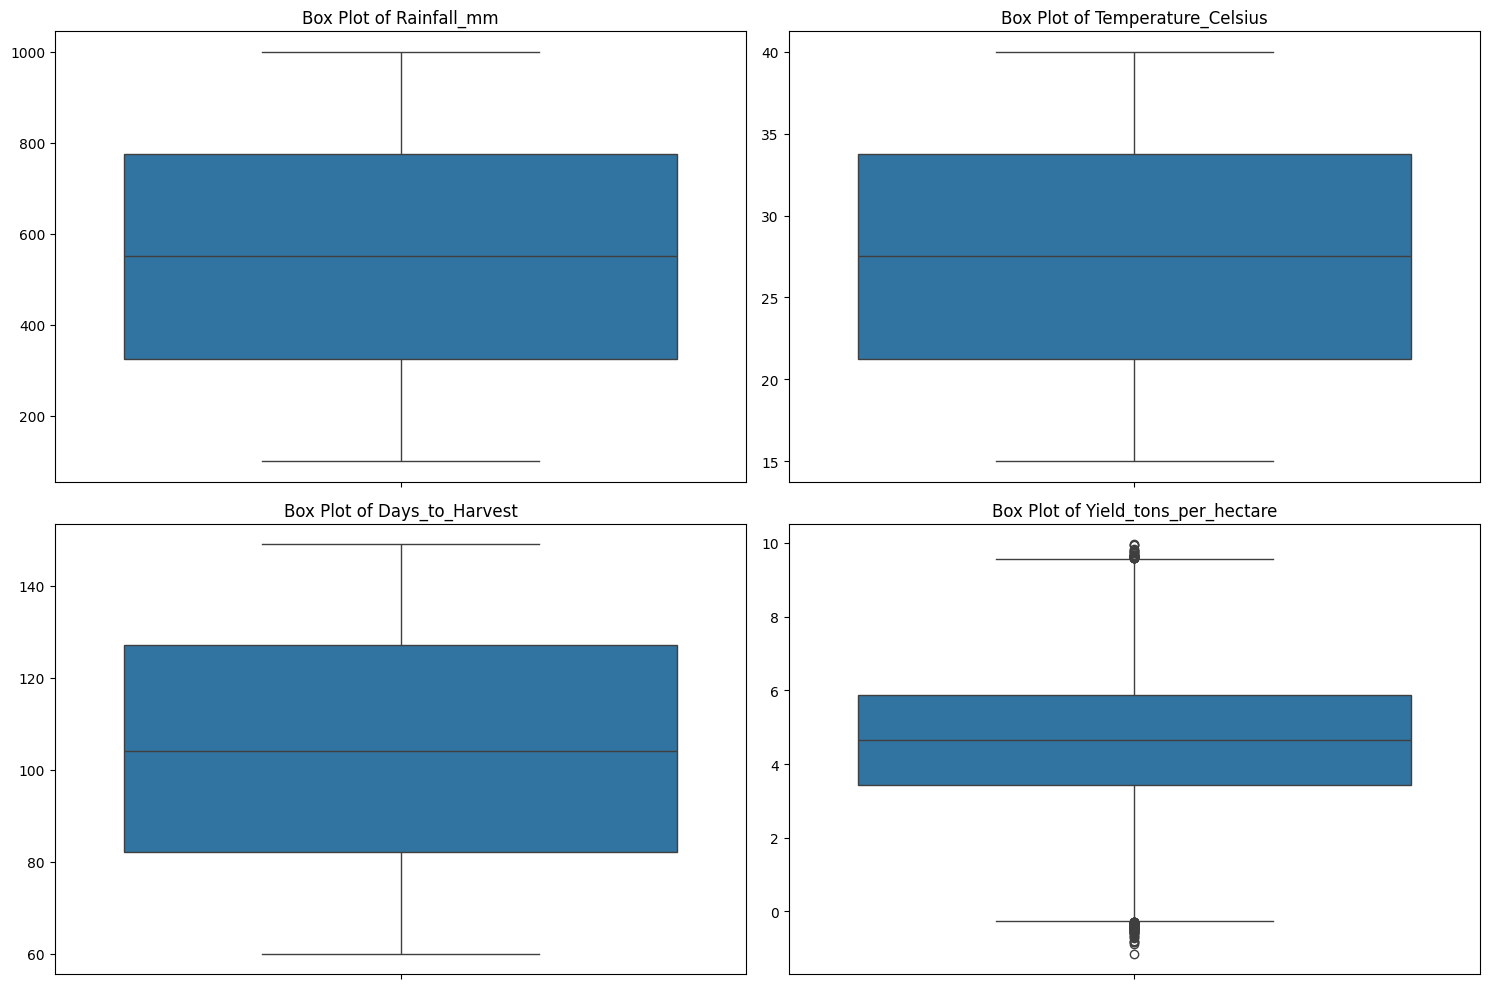

In [ ]:
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label to avoid redundancy
plt.tight_layout()
plt.show()

Pada kolom Yield_tons_per_hectare terdapat nilai negatif yang dianggap sebagai nilai error.

In [ ]:
# Penanganan Outlier
print(f"Bentuk DataFrame sebelum filtering outlier: {df.shape}")
# Menangani outlier dengan memfilter baris yang memiliki 'Yield_tons_per_hectare' negatif
df = df[df['Yield_tons_per_hectare'] >= 0]
print(f"Bentuk DataFrame setelah filtering outlier: {df.shape}")

Bentuk DataFrame sebelum filtering outlier: (1000000, 10)
Bentuk DataFrame setelah filtering outlier: (999769, 10)


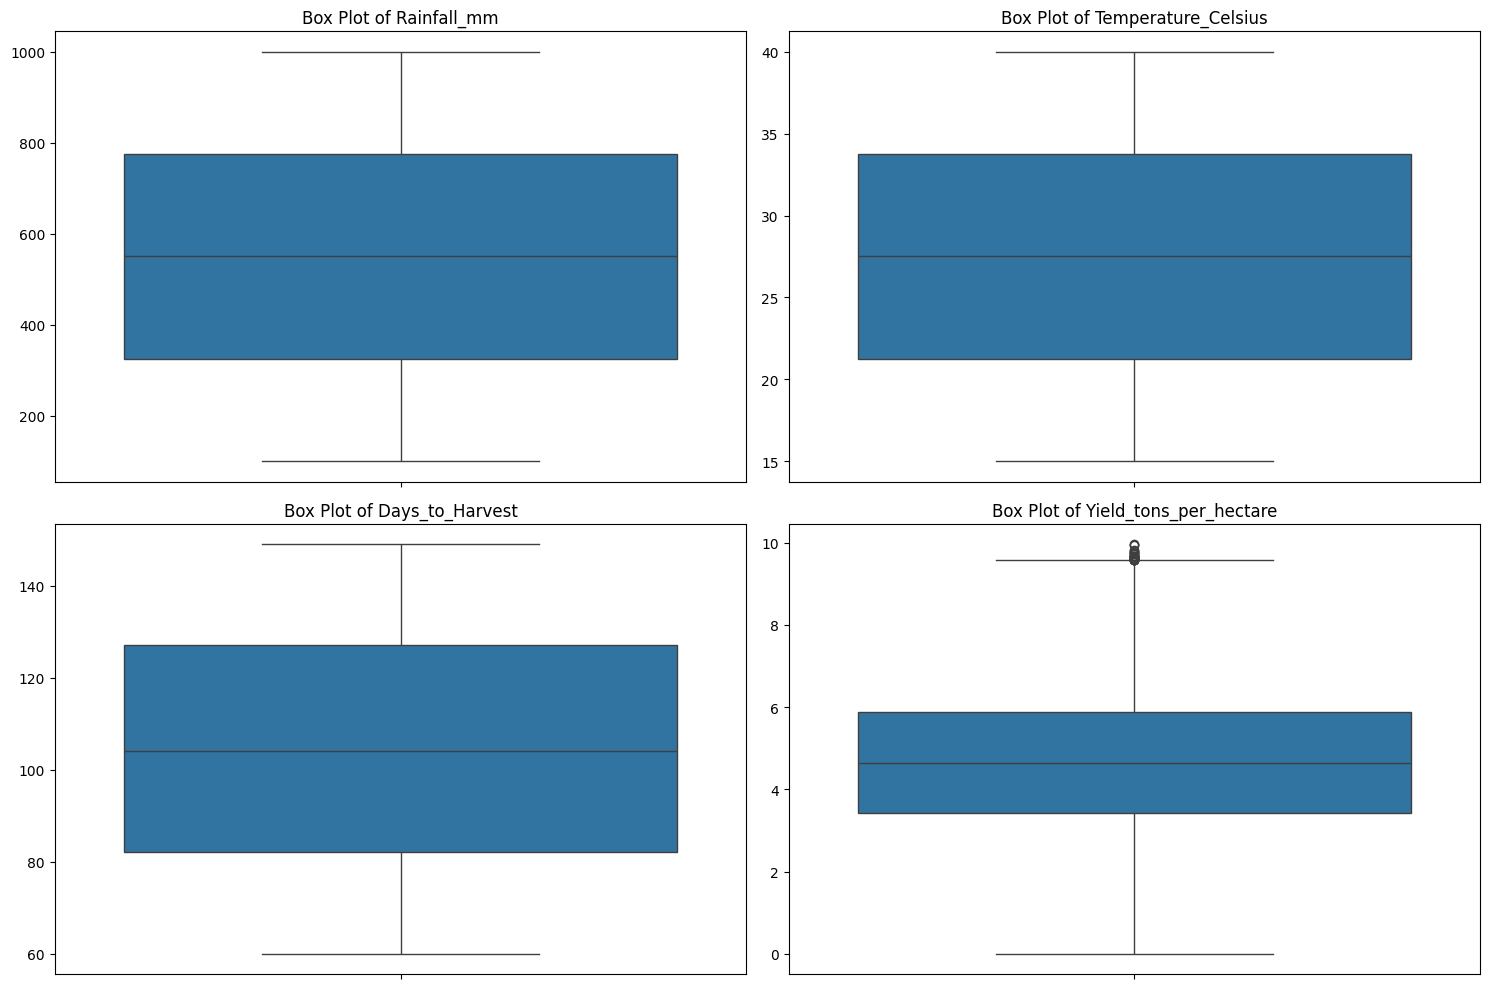

In [ ]:
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Yield_tons_per_hectare']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label to avoid redundancy
plt.tight_layout()
plt.show()

In [ ]:
# check kembali info data setelah penangan nilai outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999769 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Region                  999769 non-null  object 
 1   Soil_Type               999769 non-null  object 
 2   Crop                    999769 non-null  object 
 3   Rainfall_mm             999769 non-null  float64
 4   Temperature_Celsius     999769 non-null  float64
 5   Fertilizer_Used         999769 non-null  bool   
 6   Irrigation_Used         999769 non-null  bool   
 7   Weather_Condition       999769 non-null  object 
 8   Days_to_Harvest         999769 non-null  int64  
 9   Yield_tons_per_hectare  999769 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 70.6+ MB


## Data Exploration (exploratory analysis)

### Distribusi Fitur Numerik

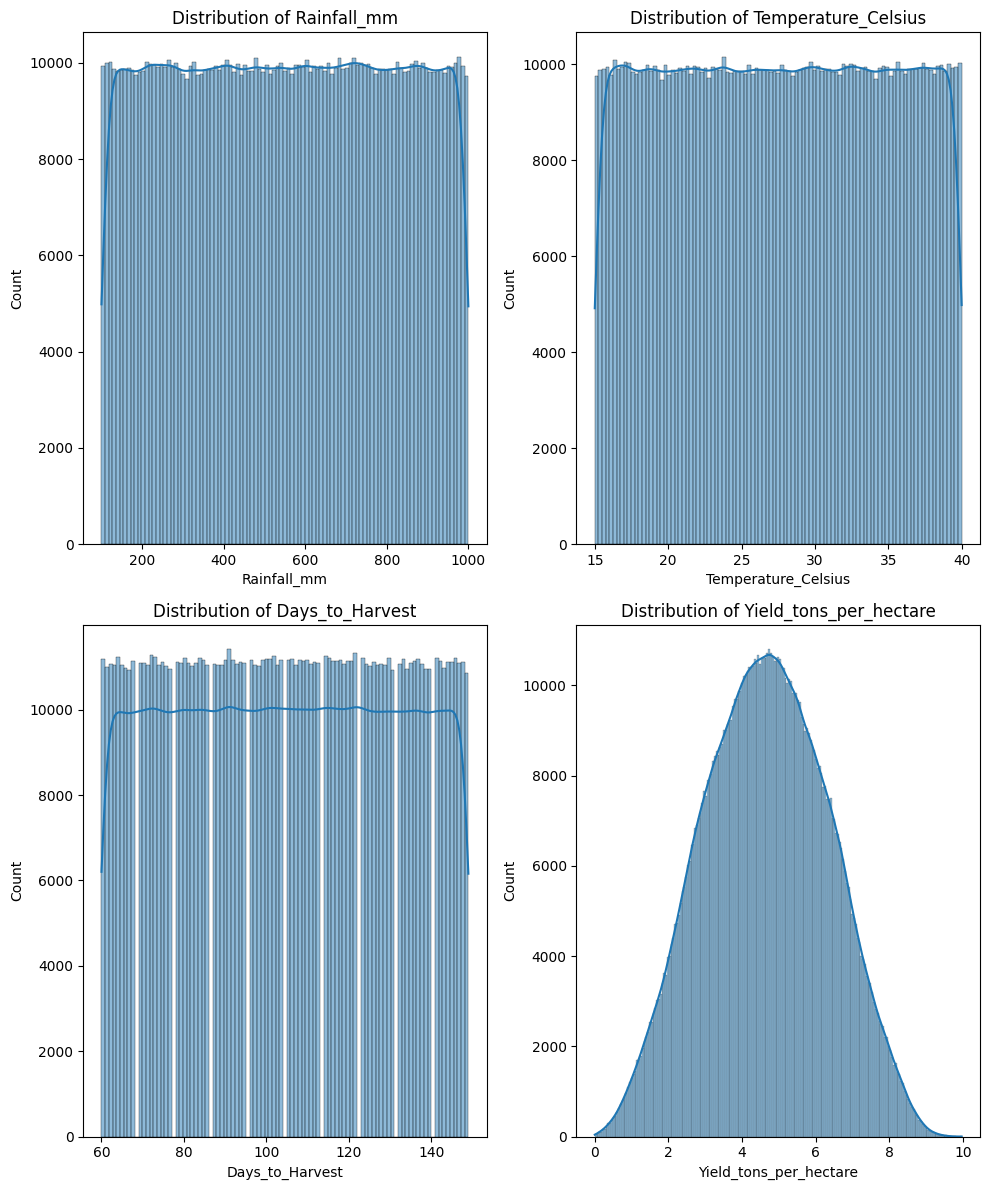

In [ ]:
num_cols = ["Rainfall_mm", "Temperature_Celsius", "Days_to_Harvest", "Yield_tons_per_hectare"]

plt.figure(figsize=(10, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# karena dataset sangat besar, maka mengampil sampel untuk membuat grafik pasangan
sample = 5000
df_sample = df.sample(n=min(sample, len(df)), random_state=42)

#### Maximum and Minimum Values for Numerical Columns

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns

print("Maximum and Minimum Values for Numerical Columns:")
for col in numerical_cols:
    print(f"Column: {col}")
    print(f"  Minimum: {df[col].min()}")
    print(f"  Maximum: {df[col].max()}")
    print("="*40 + "\n")

Maximum and Minimum Values for Numerical Columns:
Column: Rainfall_mm
  Minimum: 100.00089622522204
  Maximum: 999.998098221668

Column: Temperature_Celsius
  Minimum: 15.000034141430271
  Maximum: 39.99999662316004

Column: Days_to_Harvest
  Minimum: 60
  Maximum: 149

Column: Yield_tons_per_hectare
  Minimum: 0.0004108724039286
  Maximum: 9.963372228814649



### Distribusi Fitur Kategorikal

/tmp/ipython-input-1690856276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis') # Assign the plot to 'ax'
/tmp/ipython-input-1690856276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis') # Assign the plot to 'ax'
/tmp/ipython-input-1690856276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette='viridis') # Assign the plot to 'ax'
/tmp/ipython-input-1690856276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is

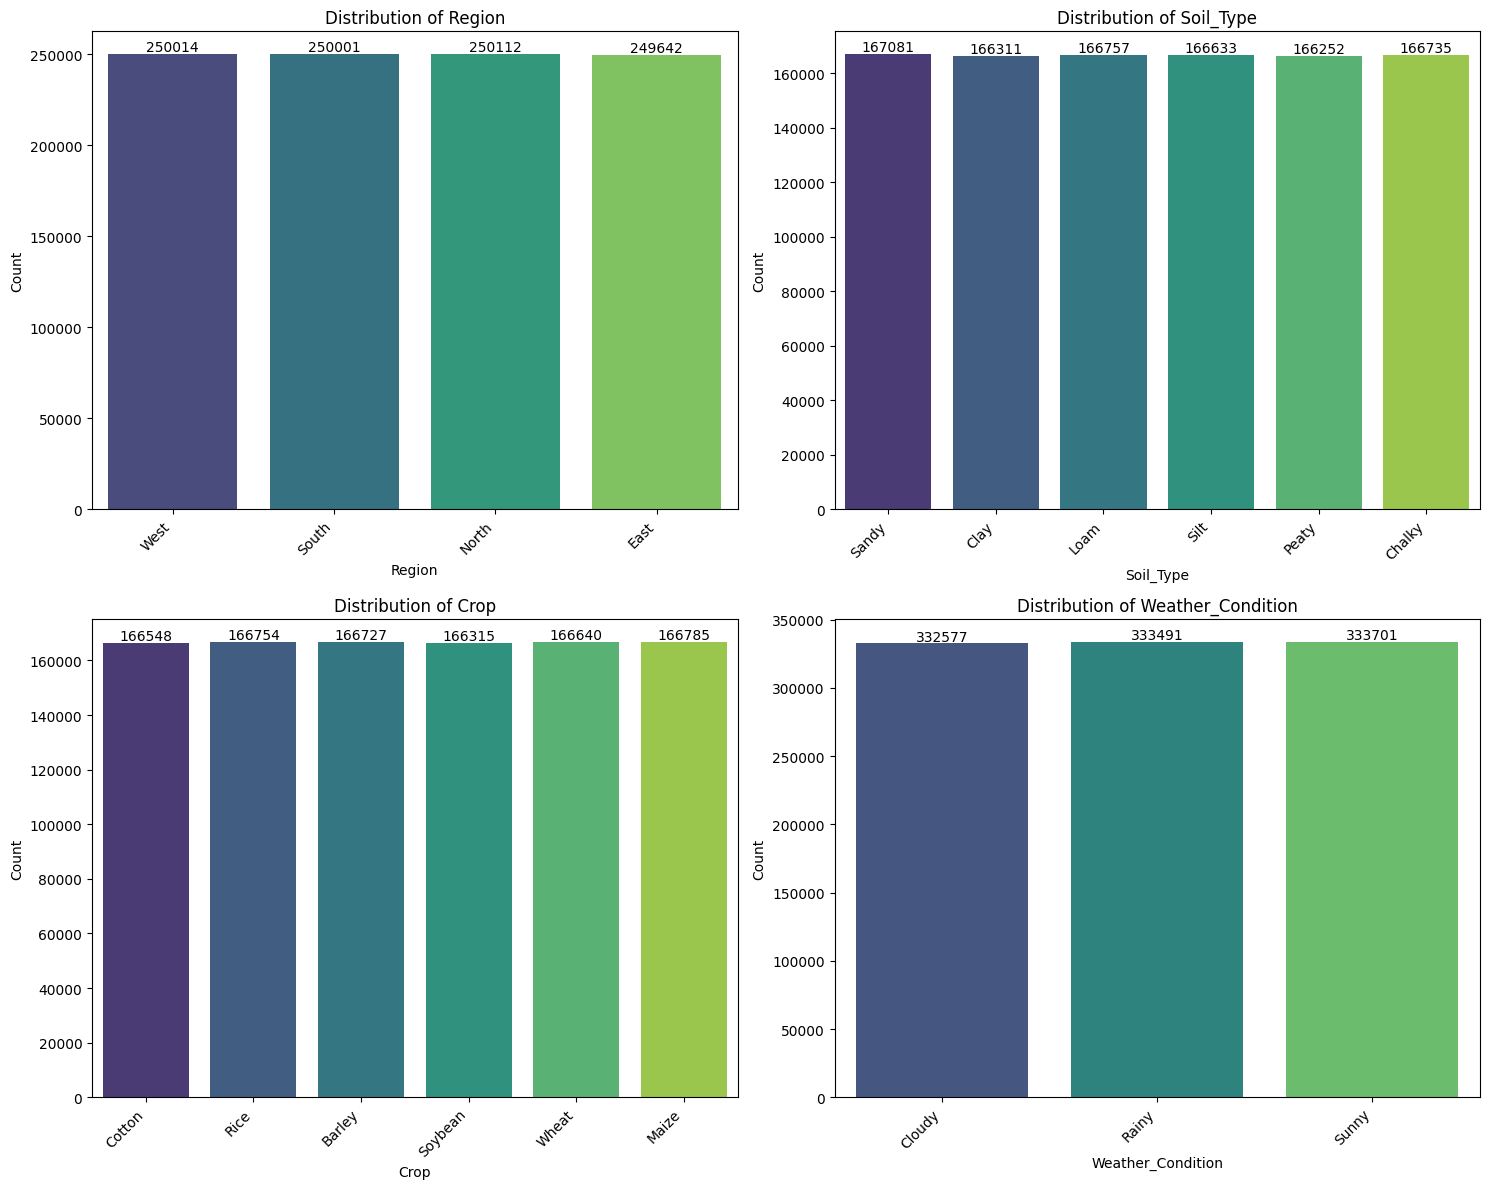

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)  # Sesuaikan grid sesuai jumlah kolom kategorikal
    ax = sns.countplot(x=col, data=df, palette='viridis') # Assign the plot to 'ax'
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    # Add count labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

#### Most Frequent, Least Frequent, and Lexicographical Min/Max for Categorical Columns

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column: {column}")
        # Most frequent value (Mode)
        mode_value = df[column].mode()[0]
        mode_count = df[column].value_counts().max()
        print(f"  Most Frequent (Mode): '{mode_value}' (Count: {mode_count})")

        # Least frequent value
        least_frequent_value = df[column].value_counts().index[-1]
        least_frequent_count = df[column].value_counts().min()
        print(f"  Least Frequent: '{least_frequent_value}' (Count: {least_frequent_count})")

        # Lexicographical Minimum and Maximum
        print(f"  Lexicographical Minimum: '{df[column].min()}'")
        print(f"  Lexicographical Maximum: '{df[column].max()}'")
        print("="*40 + "\n")

Column: Region
  Most Frequent (Mode): 'North' (Count: 250112)
  Least Frequent: 'East' (Count: 249642)
  Lexicographical Minimum: 'East'
  Lexicographical Maximum: 'West'

Column: Soil_Type
  Most Frequent (Mode): 'Sandy' (Count: 167081)
  Least Frequent: 'Peaty' (Count: 166252)
  Lexicographical Minimum: 'Chalky'
  Lexicographical Maximum: 'Silt'

Column: Crop
  Most Frequent (Mode): 'Maize' (Count: 166785)
  Least Frequent: 'Soybean' (Count: 166315)
  Lexicographical Minimum: 'Barley'
  Lexicographical Maximum: 'Wheat'

Column: Weather_Condition
  Most Frequent (Mode): 'Sunny' (Count: 333701)
  Least Frequent: 'Cloudy' (Count: 332577)
  Lexicographical Minimum: 'Cloudy'
  Lexicographical Maximum: 'Sunny'



### Korelasi kolom numerik

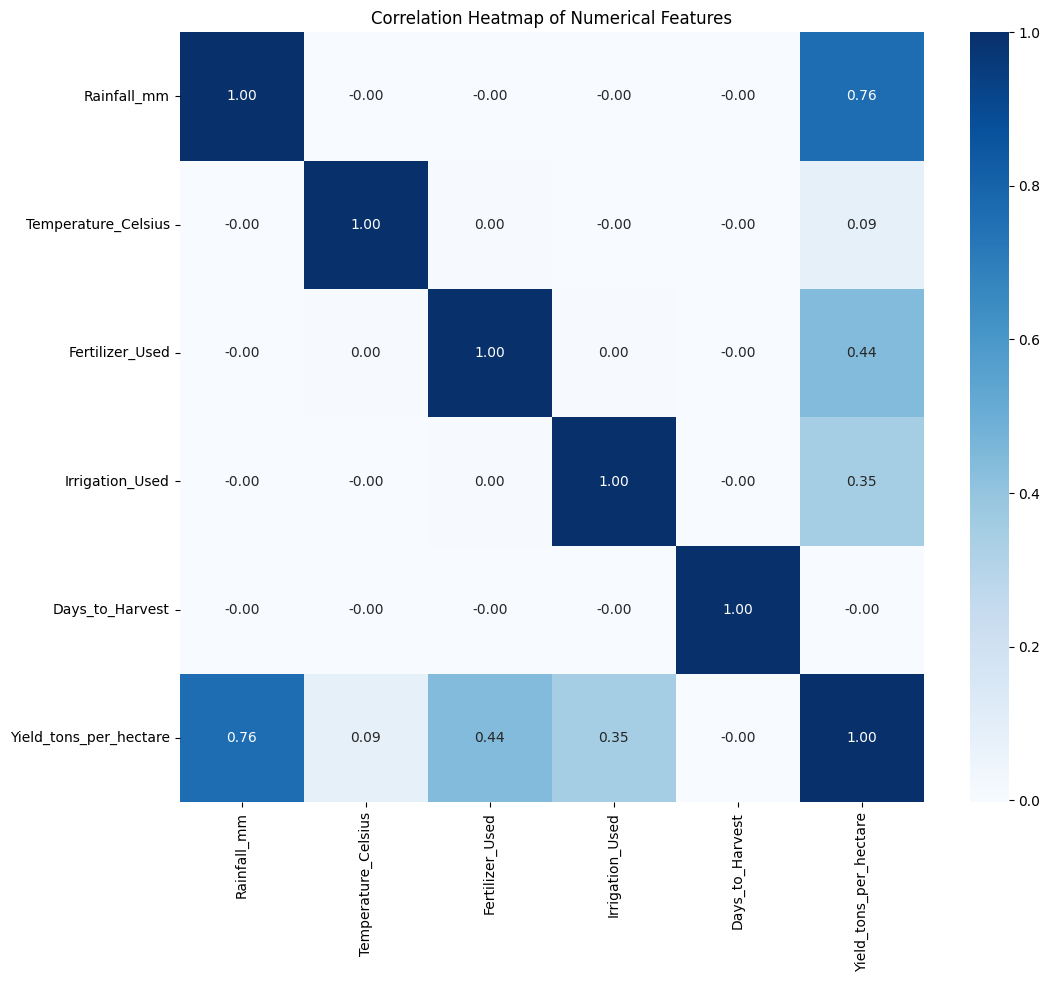

In [ ]:
# Pilih hanya kolom numerik dari DataFrame
numerical_df = df.select_dtypes(include=[np.number, bool])

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
# Pilih hanya kolom numerik dari DataFrame
numerical_df = df.select_dtypes(include=[np.number, bool])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Unstack matriks korelasi untuk mendapatkan pasangan fitur
corr_pairs = correlation_matrix.unstack()

# Sortir berdasarkan nilai korelasi (turun)
sorted_corr_pairs = corr_pairs.sort_values(ascending=False)

# Filter korelasi diri sendiri (misalnya, A-A)
# Ini memastikan bahwa kita hanya membandingkan fitur yang berbeda
filtered_pairs = sorted_corr_pairs[sorted_corr_pairs.index.map(lambda x: x[0] != x[1])]

# Hapus duplikat (misalnya, jika ada (A, B) maka (B, A) dihapus)
unique_corr_pairs = []
seen_pairs = set()

for (idx1, idx2), value in filtered_pairs.items():
    # Buat representasi kanonik dari pasangan untuk mengecek duplikasi
    canonical_pair = tuple(sorted((idx1, idx2)))
    if canonical_pair not in seen_pairs:
        unique_corr_pairs.append(((idx1, idx2), value))
        seen_pairs.add(canonical_pair)

# Konversi daftar pasangan unik kembali ke Series agar mudah diolah
final_corr_series = pd.Series([val for _, val in unique_corr_pairs],
                              index=pd.MultiIndex.from_tuples([idx for idx, _ in unique_corr_pairs]))

print("Top 5 Most Positively Correlated Pairs (excluding self-correlation):")
# Tampilkan 5 korelasi positif teratas
display(final_corr_series.sort_values(ascending=False).head(3).to_frame(name='Correlation'))

print("\nTop 5 Most Negatively Correlated Pairs:")
# Tampilkan 5 korelasi negatif teratas (paling rendah)
display(final_corr_series.sort_values(ascending=True).head(3).to_frame(name='Correlation'))

Top 5 Most Positively Correlated Pairs (excluding self-correlation):


Correlation
Rainfall_mm            Yield_tons_per_hectare     0.764512
Yield_tons_per_hectare Fertilizer_Used            0.441908
                       Irrigation_Used            0.353456


Top 5 Most Negatively Correlated Pairs:


,,Correlation
Rainfall_mm,Days_to_Harvest,-0.002678
Yield_tons_per_hectare,Days_to_Harvest,-0.002605
Rainfall_mm,Fertilizer_Used,-0.001445


### Analisis per Crop dan Region

#### Rata-rata Yield per Crop

/tmp/ipython-input-2965186514.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


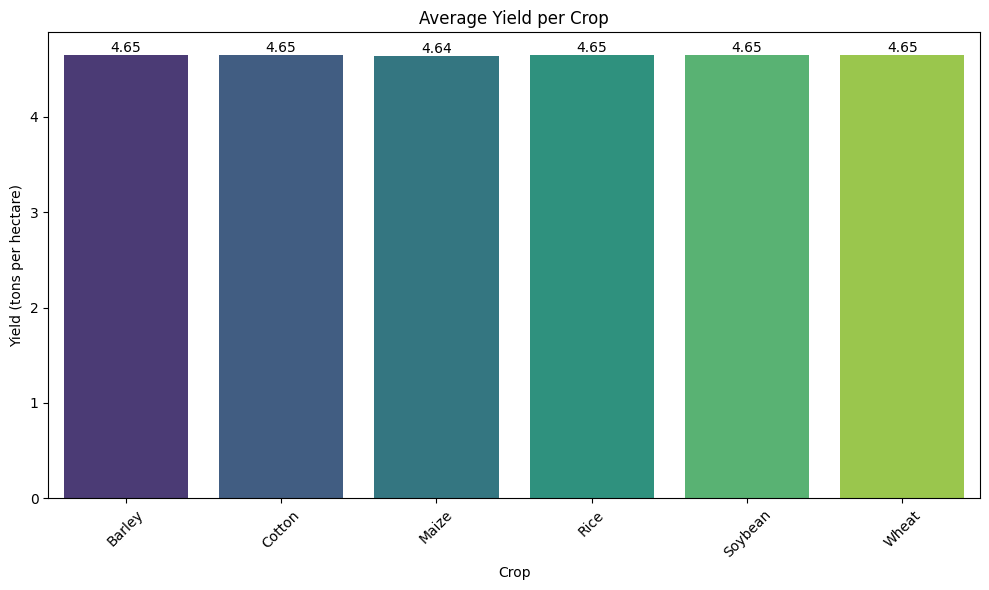

In [ ]:
plt.figure(figsize=(10, 6))

# Hitung mean yield per crop
crop_mean = df.groupby("Crop", as_index=False)["Yield_tons_per_hectare"].mean()

# Plot bar
ax = sns.barplot(
    data=crop_mean,
    x="Crop",
    y="Yield_tons_per_hectare",
    palette='viridis'
)

# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Average Yield per Crop")
plt.ylabel("Yield (tons per hectare)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Visualisasi Rata-rata Yield per Region

/tmp/ipython-input-966567884.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


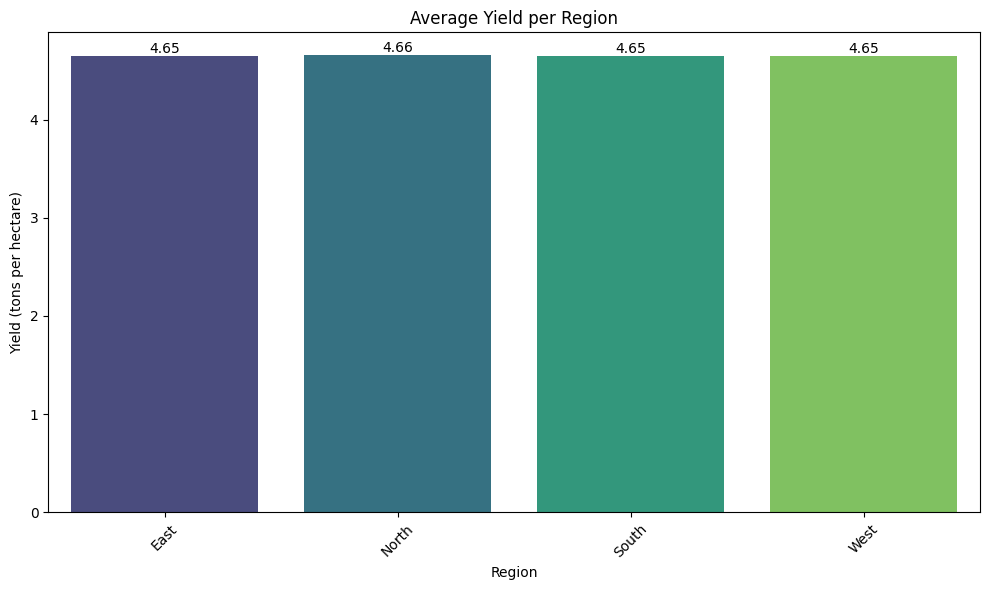

In [ ]:
plt.figure(figsize=(10, 6))

# Hitung mean yield per region
crop_mean = df.groupby("Region", as_index=False)["Yield_tons_per_hectare"].mean()

# Plot bar
ax = sns.barplot(
    data=crop_mean,
    x="Region",
    y="Yield_tons_per_hectare",
    palette='viridis'
)
# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Average Yield per Region")
plt.ylabel("Yield (tons per hectare)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Visualisasi Days to Harvest per Crop

/tmp/ipython-input-687930480.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


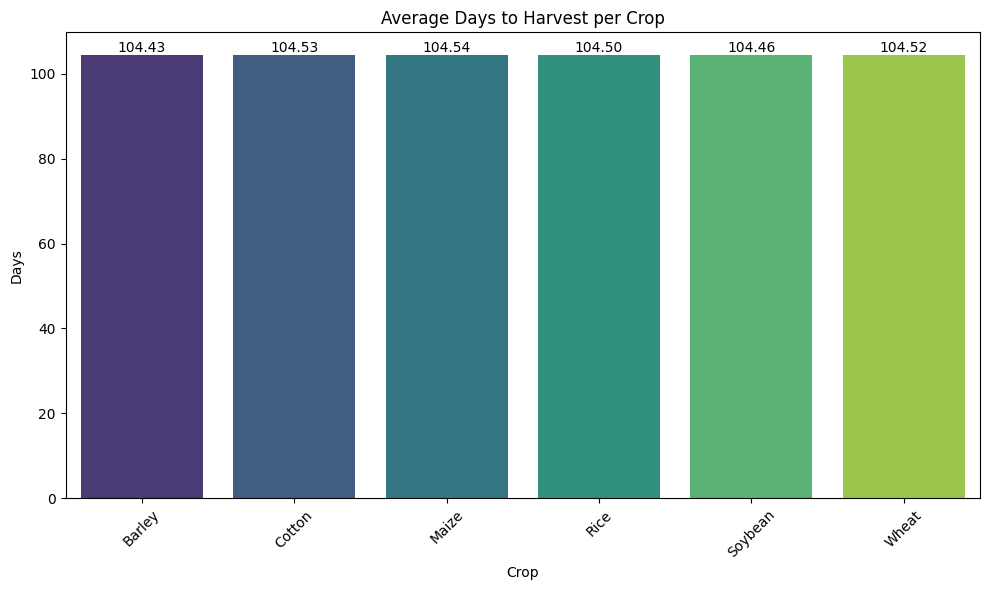

In [ ]:
plt.figure(figsize=(10,6))

# Hitung Days to Harvest per Crop
crop_mean = df.groupby("Crop", as_index=False)["Days_to_Harvest"].mean()

# Plot bar
ax = sns.barplot(
    data=crop_mean,
    x="Crop",
    y="Days_to_Harvest",
    palette='viridis'
)
# Tambahkan label nilai di atas bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.2f}",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.title("Average Days to Harvest per Crop")
plt.ylabel("Days")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Crop vs Region

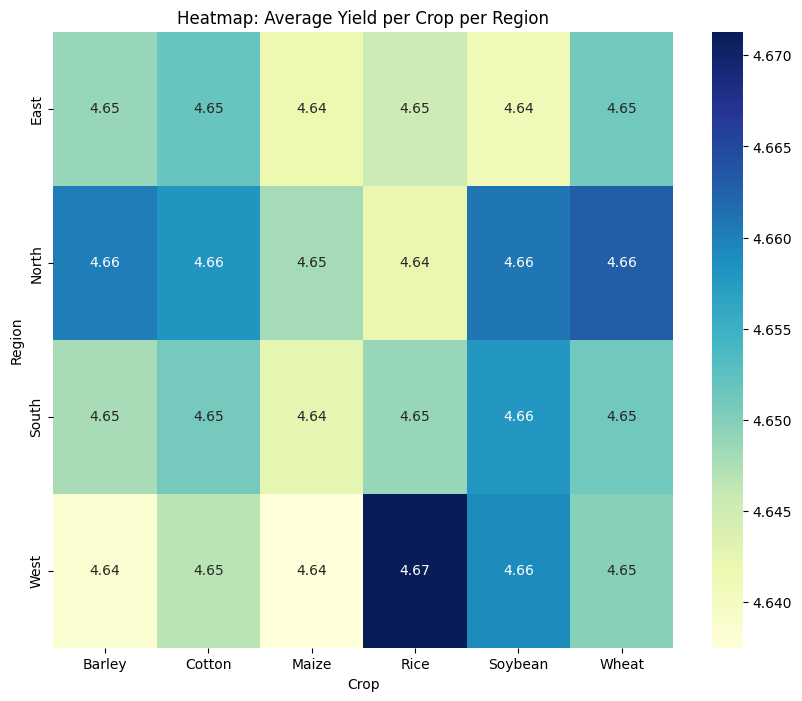

In [ ]:
# Mengetahui crop apa paling produktif di setiap region
pivot_crop = df.pivot_table(
    values="Yield_tons_per_hectare",
    index="Region",
    columns="Crop",
    aggfunc="mean"
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_crop, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap: Average Yield per Crop per Region")
plt.xlabel("Crop")
plt.ylabel("Region")
plt.show()

In [ ]:
best_crop_per_region = pivot_crop.idxmax()

print("Best crop Type for Each region based on Average Yield:")
for crop, Region in best_crop_per_region.items():
    print(f"  {crop}: {Region}")

Best crop Type for Each region based on Average Yield:
  Barley: North
  Cotton: North
  Maize: North
  Rice: West
  Soybean: North
  Wheat: North


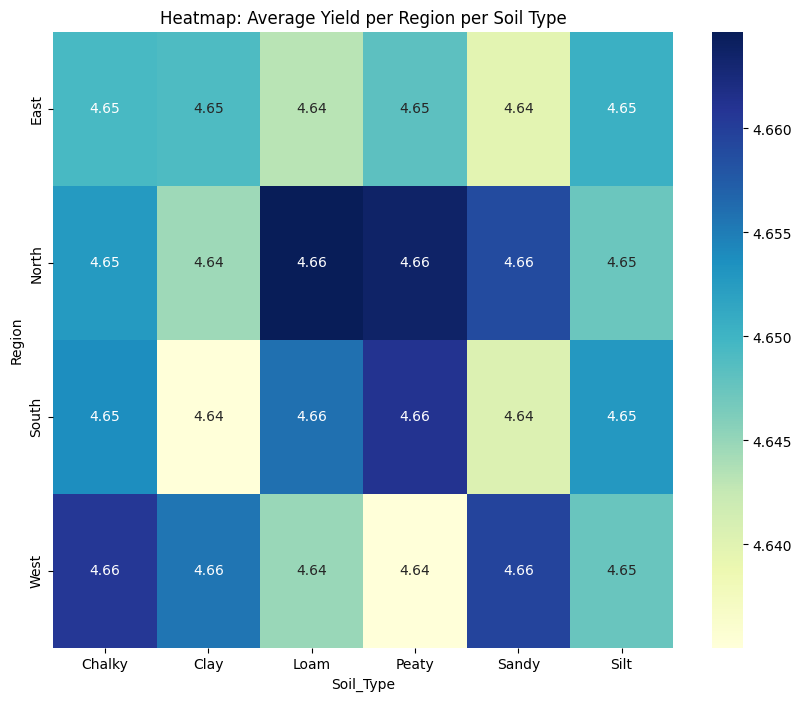

In [ ]:
pivot_soil = df.pivot_table(
    values="Yield_tons_per_hectare",
    index="Region",
    columns="Soil_Type",
    aggfunc="mean"
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_soil, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap: Average Yield per Region per Soil Type")
plt.xlabel("Soil_Type")
plt.ylabel("Region")
plt.show()

In [ ]:
best_soil_per_Region = pivot_soil.idxmax()

print("Best Soil Type for Each Crop based on Average Yield:")
for soil_type, Region in best_soil_per_Region.items():
    print(f"  {soil_type}: {Region}")

Best Soil Type for Each Crop based on Average Yield:
  Chalky: West
  Clay: West
  Loam: North
  Peaty: North
  Sandy: West
  Silt: South


#### Soil Type vs Crop

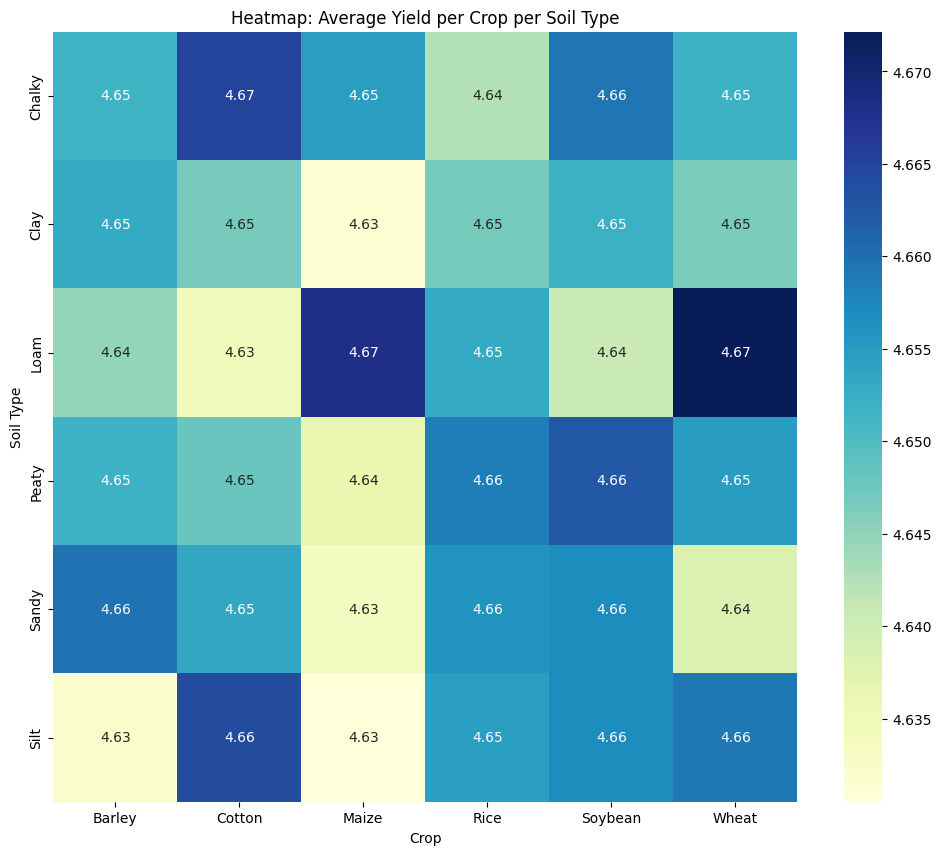

In [ ]:
pivot_soil = df.pivot_table(
    values="Yield_tons_per_hectare",
    index="Soil_Type",
    columns="Crop",
    aggfunc="mean"
)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_soil, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Heatmap: Average Yield per Crop per Soil Type")
plt.xlabel("Crop")
plt.ylabel("Soil Type")
plt.show()

In [ ]:
best_soil_per_crop = pivot_soil.idxmax()

print("Best Soil Type for Each Crop based on Average Yield:")
for crop, soil_type in best_soil_per_crop.items():
    print(f"  {crop}: {soil_type}")

Best Soil Type for Each Crop based on Average Yield:
  Barley: Sandy
  Cotton: Chalky
  Maize: Loam
  Rice: Peaty
  Soybean: Peaty
  Wheat: Loam


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Definisikan fitur (X) dan target (y)
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Split data menjadi training (60%), validation (20%), dan test (20%)
# bagi data menjadi training + validation (80%) dan test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# bagi training + validation (80%) menjadi training (60% dari total) dan validation (20% dari total)
# Karena X_train_val sekarang adalah 80% dari total, kita akan mengambil 25% dari X_train_val untuk validation
# (0.25 * 0.8 = 0.2 atau 20% dari total data)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

# Cetak ukuran setiap set untuk verifikasi
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran X_val: {X_val.shape}")
print(f"Ukuran y_val: {y_val.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (599861, 9)
Ukuran y_train: (599861,)
Ukuran X_val: (199954, 9)
Ukuran y_val: (199954,)
Ukuran X_test: (199954, 9)
Ukuran y_test: (199954,)


# Feature Engineering

## Lebel Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'Fertilizer_Used' column
# Fit on X_train and transform all datasets
X_train['Fertilizer_Used'] = le.fit_transform(X_train['Fertilizer_Used'])
X_val['Fertilizer_Used'] = le.transform(X_val['Fertilizer_Used'])
X_test['Fertilizer_Used'] = le.transform(X_test['Fertilizer_Used'])

# Apply Label Encoding to 'Irrigation_Used' column
# Fit on X_train and transform all datasets
X_train['Irrigation_Used'] = le.fit_transform(X_train['Irrigation_Used'])
X_val['Irrigation_Used'] = le.transform(X_val['Irrigation_Used'])
X_test['Irrigation_Used'] = le.transform(X_test['Irrigation_Used'])

print("Label Encoding applied to 'Fertilizer_Used' and 'Irrigation_Used' columns.")

# Display the head of X_train to show the changes
display(X_train.head())

Label Encoding applied to 'Fertilizer_Used' and 'Irrigation_Used' columns.


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest
555037,North,Sandy,Barley,769.420725,19.742918,1,1,Cloudy,75
768550,West,Silt,Wheat,250.120951,35.593956,1,0,Cloudy,98
763806,North,Loam,Wheat,761.102172,30.384247,0,0,Cloudy,106
741377,South,Sandy,Wheat,649.087829,25.881646,0,0,Sunny,135
577969,South,Peaty,Cotton,161.321833,23.615704,1,1,Cloudy,92


## One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns for OHE
categorical_cols_ohe = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform X_train
X_train_ohe = ohe.fit_transform(X_train[categorical_cols_ohe])

# Transform X_val and X_test
X_val_ohe = ohe.transform(X_val[categorical_cols_ohe])
X_test_ohe = ohe.transform(X_test[categorical_cols_ohe])

# Create DataFrames from OHE output
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(categorical_cols_ohe), index=X_train.index)
X_val_ohe_df = pd.DataFrame(X_val_ohe, columns=ohe.get_feature_names_out(categorical_cols_ohe), index=X_val.index)
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(categorical_cols_ohe), index=X_test.index)

# Drop original categorical columns and concatenate with OHE features
X_train = pd.concat([X_train.drop(columns=categorical_cols_ohe), X_train_ohe_df], axis=1)
X_val = pd.concat([X_val.drop(columns=categorical_cols_ohe), X_val_ohe_df], axis=1)
X_test = pd.concat([X_test.drop(columns=categorical_cols_ohe), X_test_ohe_df], axis=1)

print("One-Hot Encoding applied to specified categorical columns.")

# Display the head of X_train to show the changes
display(X_train.head())

One-Hot Encoding applied to specified categorical columns.


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
555037,769.420725,19.742918,1,1,75,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
768550,250.120951,35.593956,1,0,98,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
763806,761.102172,30.384247,0,0,106,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
741377,649.087829,25.881646,0,0,135,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
577969,161.321833,23.615704,1,1,92,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns for scaling (excluding the target and already transformed booleans/OHE)
numerical_cols_to_scale = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of X_train and transform them
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Transform the numerical columns of X_val and X_test using the fitted scaler
X_val[numerical_cols_to_scale] = scaler.transform(X_val[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("Numerical features scaled successfully.")

# Display the head of X_train to show the changes
display(X_train.head())

Numerical features scaled successfully.


,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,...,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
555037,0.843652,-1.074718,1,1,-1.137316,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
768550,-1.155468,1.120215,1,0,-0.251166,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
763806,0.811629,0.398814,0,0,0.057060,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
741377,0.380413,-0.224673,0,0,1.174381,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
577969,-1.497314,-0.538443,1,1,-0.482336,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Modeling

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Fungsi MAPE manual (karena tidak ada di sklearn)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Prediksi pada validation set
pred_val_lr = model_lr.predict(X_val)

# Evaluasi lengkap
mae = mean_absolute_error(y_val, pred_val_lr)
r2 = r2_score(y_val, pred_val_lr)
rmse = np.sqrt(mean_squared_error(y_val, pred_val_lr))
mape = mean_absolute_percentage_error(y_val, pred_val_lr)

print("Linear Regression - Validation MAE:", mae)
print("Linear Regression - Validation RMSE:", rmse)
print("Linear Regression - Validation MAPE (%):", mape)
print("Linear Regression - Validation R2:", r2)


Linear Regression - Validation MAE: 0.3985595350340706
Linear Regression - Validation RMSE: 0.49953126048525137
Linear Regression - Validation MAPE (%): 11.799602509908407
Linear Regression - Validation R2: 0.9130719258094434


### Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Fungsi MAPE manual
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Prediksi pada validation set
pred_val_ridge = model_ridge.predict(X_val)

# Evaluasi lengkap Ridge
mae_ridge = mean_absolute_error(y_val, pred_val_ridge)
r2_ridge = r2_score(y_val, pred_val_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_val, pred_val_ridge))
mape_ridge = mean_absolute_percentage_error(y_val, pred_val_ridge)

print("Ridge Regression - Validation MAE:", mae_ridge)
print("Ridge Regression - Validation RMSE:", rmse_ridge)
print("Ridge Regression - Validation MAPE (%):", mape_ridge)
print("Ridge Regression - Validation R2:", r2_ridge)


Ridge Regression - Validation MAE: 0.3985595278082109
Ridge Regression - Validation RMSE: 0.49953125524297404
Ridge Regression - Validation MAPE (%): 11.79963253537438
Ridge Regression - Validation R2: 0.9130719276339581


### Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Fungsi MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_lasso = Lasso(alpha=0.001)
model_lasso.fit(X_train, y_train)

# Prediksi pada validation set
pred_val_lasso = model_lasso.predict(X_val)

# Evaluasi lengkap Lasso
mae_lasso = mean_absolute_error(y_val, pred_val_lasso)
r2_lasso = r2_score(y_val, pred_val_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_val, pred_val_lasso))
mape_lasso = mean_absolute_percentage_error(y_val, pred_val_lasso)

print("Lasso - Validation MAE:", mae_lasso)
print("Lasso - Validation RMSE:", rmse_lasso)
print("Lasso - Validation MAPE (%):", mape_lasso)
print("Lasso - Validation R2:", r2_lasso)


Lasso - Validation MAE: 0.39856794088924785
Lasso - Validation RMSE: 0.49954171756048704
Lasso - Validation MAPE (%): 11.813802462238126
Lasso - Validation R2: 0.9130682863057792


## XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Fungsi MAPE (gunakan yang sama untuk semua model)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_xgb = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_xgb.fit(X_train, y_train)

# Prediksi pada validation set
pred_val_xgb = model_xgb.predict(X_val)

# Evaluasi lengkap XGBoost
mae_xgb = mean_absolute_error(y_val, pred_val_xgb)
r2_xgb = r2_score(y_val, pred_val_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, pred_val_xgb))
mape_xgb = mean_absolute_percentage_error(y_val, pred_val_xgb)

print("XGBoost - Validation MAE:", mae_xgb)
print("XGBoost - Validation RMSE:", rmse_xgb)
print("XGBoost - Validation MAPE (%):", mape_xgb)
print("XGBoost - Validation R2:", r2_xgb)


XGBoost - Validation MAE: 0.39945620853873337
XGBoost - Validation RMSE: 0.5005636632527639
XGBoost - Validation MAPE (%): 11.843569719010903
XGBoost - Validation R2: 0.91271223851385


## Membandingkan Matriks

In [ ]:
print("="*75)
print("FINAL MODEL RANKING - VALIDATION SET")
print("="*75)
print(f"{'Model':<18} {'MAE':<12} {'RMSE':<12} {'MAPE(%)':<12} {'R2':<12}")
print("-"*75)
models = [
    ("Linear", mae, rmse, mape, r2),
    ("Ridge", mae_ridge, rmse_ridge, mape_ridge, r2_ridge),
    ("Lasso", mae_lasso, rmse_lasso, mape_lasso, r2_lasso),
    ("XGBoost", mae_xgb, rmse_xgb, mape_xgb, r2_xgb)
]

for name, mae_val, rmse_val, mape_val, r2_val in models:
    print(f"{name:<18} {mae_val:<12.4f} {rmse_val:<12.4f} {mape_val:<12.2f} {r2_val:<12.4f}")
print("="*75)


FINAL MODEL RANKING - VALIDATION SET
Model              MAE          RMSE         MAPE(%)      R2          
---------------------------------------------------------------------------
Linear             0.3986       0.4995       11.80        0.9131      
Ridge              0.3986       0.4995       11.80        0.9131      
Lasso              0.3986       0.4995       11.81        0.9131      
XGBoost            0.3995       0.5006       11.84        0.9127      


# Retrain Model Terbaik Menggunakan Train + Validation

In [ ]:
# Gabungkan Train + Validation untuk retraining
X_final = pd.concat([X_train, X_val])
y_final = pd.concat([y_train, y_val])

# Retrain model terbaik (Ridge)
final_model = Ridge(alpha=1.0)
final_model.fit(X_final, y_final)

Ridge()

# Final Test Evaluation

In [ ]:
# FINAL EVALUATION DI TEST SET

final_pred = final_model.predict(X_test)

print("\n=== FINAL TEST RESULTS ===")
print("FINAL TEST MAE:", mean_absolute_error(y_test, final_pred))
print("FINAL TEST R2 :", r2_score(y_test, final_pred))


=== FINAL TEST RESULTS ===
FINAL TEST MAE: 0.39833857064111006
FINAL TEST R2 : 0.9132337233411184


# Feature Importance - Ridge Regression

Feature Importance (Ridge Regression):


,Feature,Coefficient,Absolute_Coefficient
2,Fertilizer_Used,1.501042,1.501042
0,Rainfall_mm,1.297091,1.297091
3,Irrigation_Used,1.199224,1.199224
1,Temperature_Celsius,0.143701,0.143701
14,Soil_Type_Silt,-0.002437,0.002437
10,Soil_Type_Clay,0.002371,0.002371
13,Soil_Type_Sandy,0.001513,0.001513
6,Region_North,0.001468,0.001468
17,Crop_Maize,-0.001454,0.001454
15,Crop_Barley,0.001387,0.001387


/tmp/ipython-input-1305007901.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df, palette='viridis')


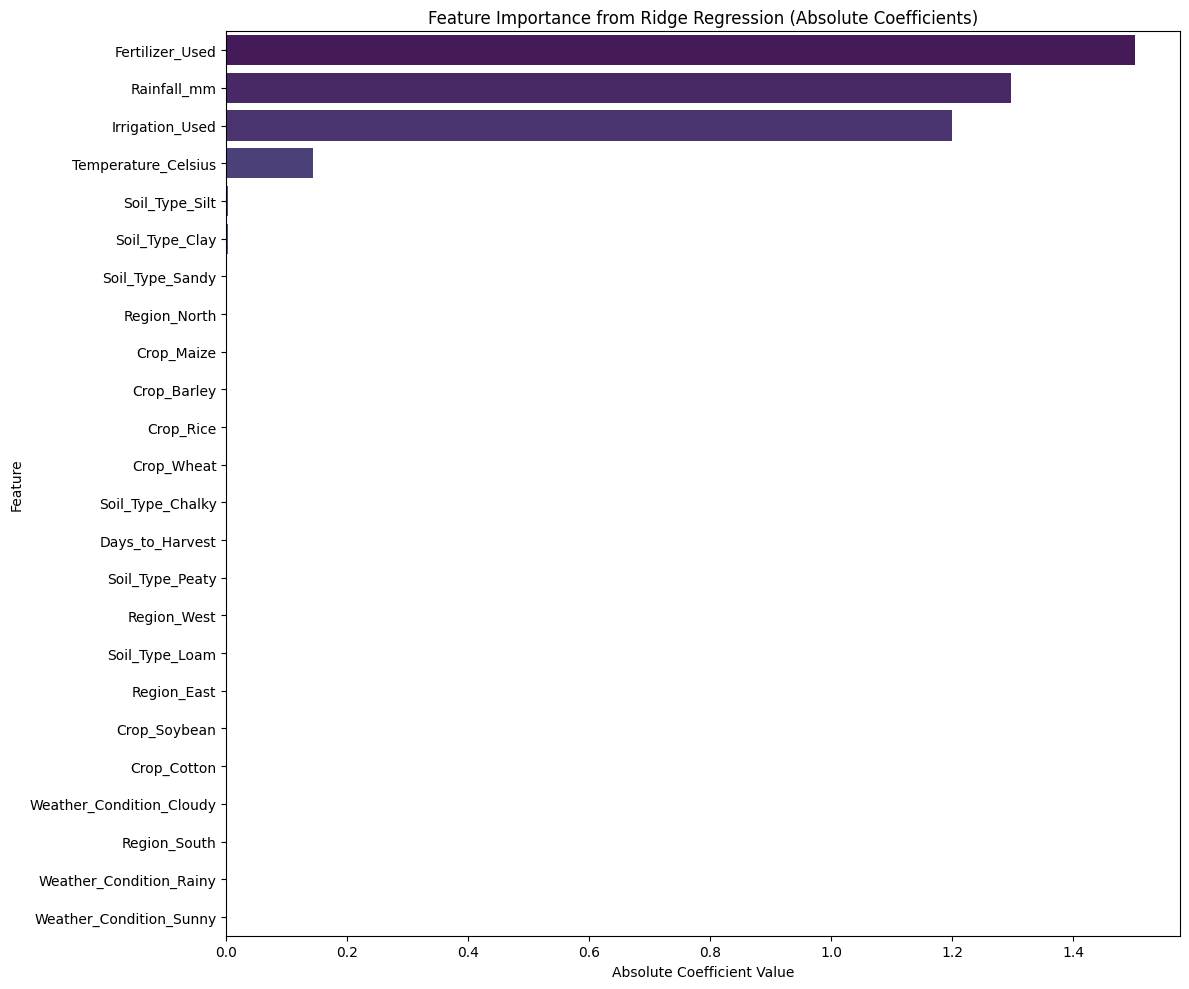

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dapatkan koefisien dari final_model (model Ridge)
coefficients = final_model.coef_

# Dapatkan nama fitur dari X_final
feature_names = X_final.columns

# Buat DataFrame untuk koefisien dan nama fitur
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Urutkan berdasarkan nilai absolut koefisien
feature_importance_df['Absolute_Coefficient'] = abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Feature Importance (Ridge Regression):")
display(feature_importance_df)

# Visualisasi Feature Importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Ridge Regression (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Membuat Pipeline (Encoding + Scaling + Model Ridge)

## Import Library

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge
import joblib


## Split Data

In [ ]:
# Pisahkan fitur dan target
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']

# Split Train+Val (80%) dan Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split Train (60%) dan Val (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42
)

print("Ukuran X_train:", X_train.shape)
print("Ukuran X_val:", X_val.shape)
print("Ukuran X_test:", X_test.shape)


Ukuran X_train: (599861, 9)
Ukuran X_val: (199954, 9)
Ukuran X_test: (199954, 9)


## Label Encoding untuk Dua Kolom Kategori

In [ ]:
# Inisialisasi encoder
le_fertilizer = LabelEncoder()
le_irrigation = LabelEncoder()

# FIT hanya di TRAIN
X_train["Fertilizer_Used"] = le_fertilizer.fit_transform(X_train["Fertilizer_Used"])
X_train["Irrigation_Used"] = le_irrigation.fit_transform(X_train["Irrigation_Used"])

# TRANSFORM di VAL
X_val["Fertilizer_Used"] = le_fertilizer.transform(X_val["Fertilizer_Used"])
X_val["Irrigation_Used"] = le_irrigation.transform(X_val["Irrigation_Used"])

# TRANSFORM di TEST
X_test["Fertilizer_Used"] = le_fertilizer.transform(X_test["Fertilizer_Used"])
X_test["Irrigation_Used"] = le_irrigation.transform(X_test["Irrigation_Used"])


## Definisikan Kolom Numerik & Kategori

In [ ]:
numeric_features = [
    "Rainfall_mm",
    "Temperature_Celsius",
    "Days_to_Harvest"
]

categorical_features = [
    "Fertilizer_Used",
    "Irrigation_Used"
]


## Buat Preprocessor dan Pipeline Model

In [ ]:
# Preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", "passthrough", categorical_features)
])

# Model
model = Ridge(alpha=1.0)

# Pipeline
final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])


## Train Model

In [ ]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rainfall_mm',
                                                   'Temperature_Celsius',
                                                   'Days_to_Harvest']),
                                                 ('cat', 'passthrough',
                                                  ['Fertilizer_Used',
                                                   'Irrigation_Used'])])),
                ('model', Ridge())])

## Save Model & Encoder (untuk Streamlit)

In [ ]:
joblib.dump(final_pipeline, "final_model.pkl")
joblib.dump(le_fertilizer, "le_fertilizer.pkl")
joblib.dump(le_irrigation, "le_irrigation.pkl")

print("Model dan encoder berhasil disimpan!")


Model dan encoder berhasil disimpan!
